[2019-07-23 11:15:33.515988] INFO: bigquant: instruments.v2 开始运行..

[2019-07-23 11:15:33.563786] INFO: bigquant: 命中缓存

[2019-07-23 11:15:33.566868] INFO: bigquant: instruments.v2 运行完成[0.050861s].

[2019-07-23 11:15:33.571150] INFO: bigquant: input_features.v1 开始运行..

[2019-07-23 11:15:33.609278] INFO: bigquant: 命中缓存

[2019-07-23 11:15:33.613405] INFO: bigquant: input_features.v1 运行完成[0.042228s].

[2019-07-23 11:15:33.616982] INFO: bigquant: input_features.v1 开始运行..

[2019-07-23 11:15:33.654745] INFO: bigquant: 命中缓存

[2019-07-23 11:15:33.657093] INFO: bigquant: input_features.v1 运行完成[0.040107s].

[2019-07-23 11:15:33.660262] INFO: bigquant: use_datasource.v1 开始运行..

[2019-07-23 11:15:33.698692] INFO: bigquant: 命中缓存

[2019-07-23 11:15:33.700798] INFO: bigquant: use_datasource.v1 运行完成[0.040501s].

[2019-07-23 11:15:33.707587] INFO: bigquant: standardlize.v8 开始运行..

[2019-07-23 11:15:37.379449] INFO: bigquant: standardlize.v8 运行完成[3.671752s].

[2019-07-23 11:15:37.383304] INFO: bigquant: dropnan.v1 开始运行..

[2019-07-23 11:15:38.639368] INFO: dropnan: /data, 1235664/1620594

[2019-07-23 11:15:38.940231] INFO: dropnan: 行数: 1235664/1620594

[2019-07-23 11:15:38.958717] INFO: bigquant: dropnan.v1 运行完成[1.575395s].

[2019-07-23 11:15:38.962451] INFO: bigquant: filter.v3 开始运行..

[2019-07-23 11:15:38.968420] INFO: filter: 使用表达式 date=='2017-01-05' 过滤

[2019-07-23 11:15:39.248484] INFO: filter: 过滤 /data, 2504/0/1235664

[2019-07-23 11:15:39.400177] INFO: bigquant: filter.v3 运行完成[0.437704s].

[2019-07-23 11:15:39.405784] INFO: bigquant: sns_jointplot.v2 开始运行..

[2019-07-23 11:15:41.052778] INFO: bigquant: sns_jointplot.v2 运行完成[1.646965s].

[2019-07-23 11:15:41.058715] INFO: bigquant: sns_displot.v1 开始运行..

[2019-07-23 11:15:41.950048] INFO: bigquant: sns_displot.v1 运行完成[0.891295s].

[2019-07-23 11:15:41.958262] INFO: bigquant: sns_catplot.v1 开始运行..

[2019-07-23 11:15:55.224943] INFO: bigquant: sns_catplot.v1 运行完成[13.266652s].

[2019-07-23 11:15:55.231140] INFO: bigquant: sns_pairgrid.v3 开始运行..

[2019-07-23 11:16:01.565542] INFO: bigquant: sns_pairgrid.v3 运行完成[6.334368s].

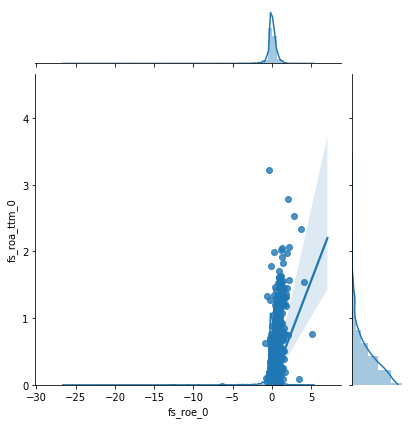

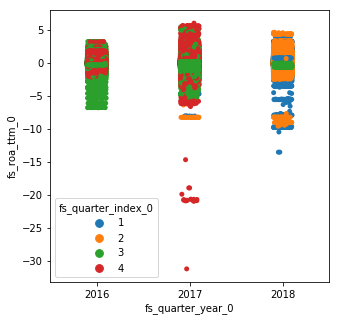

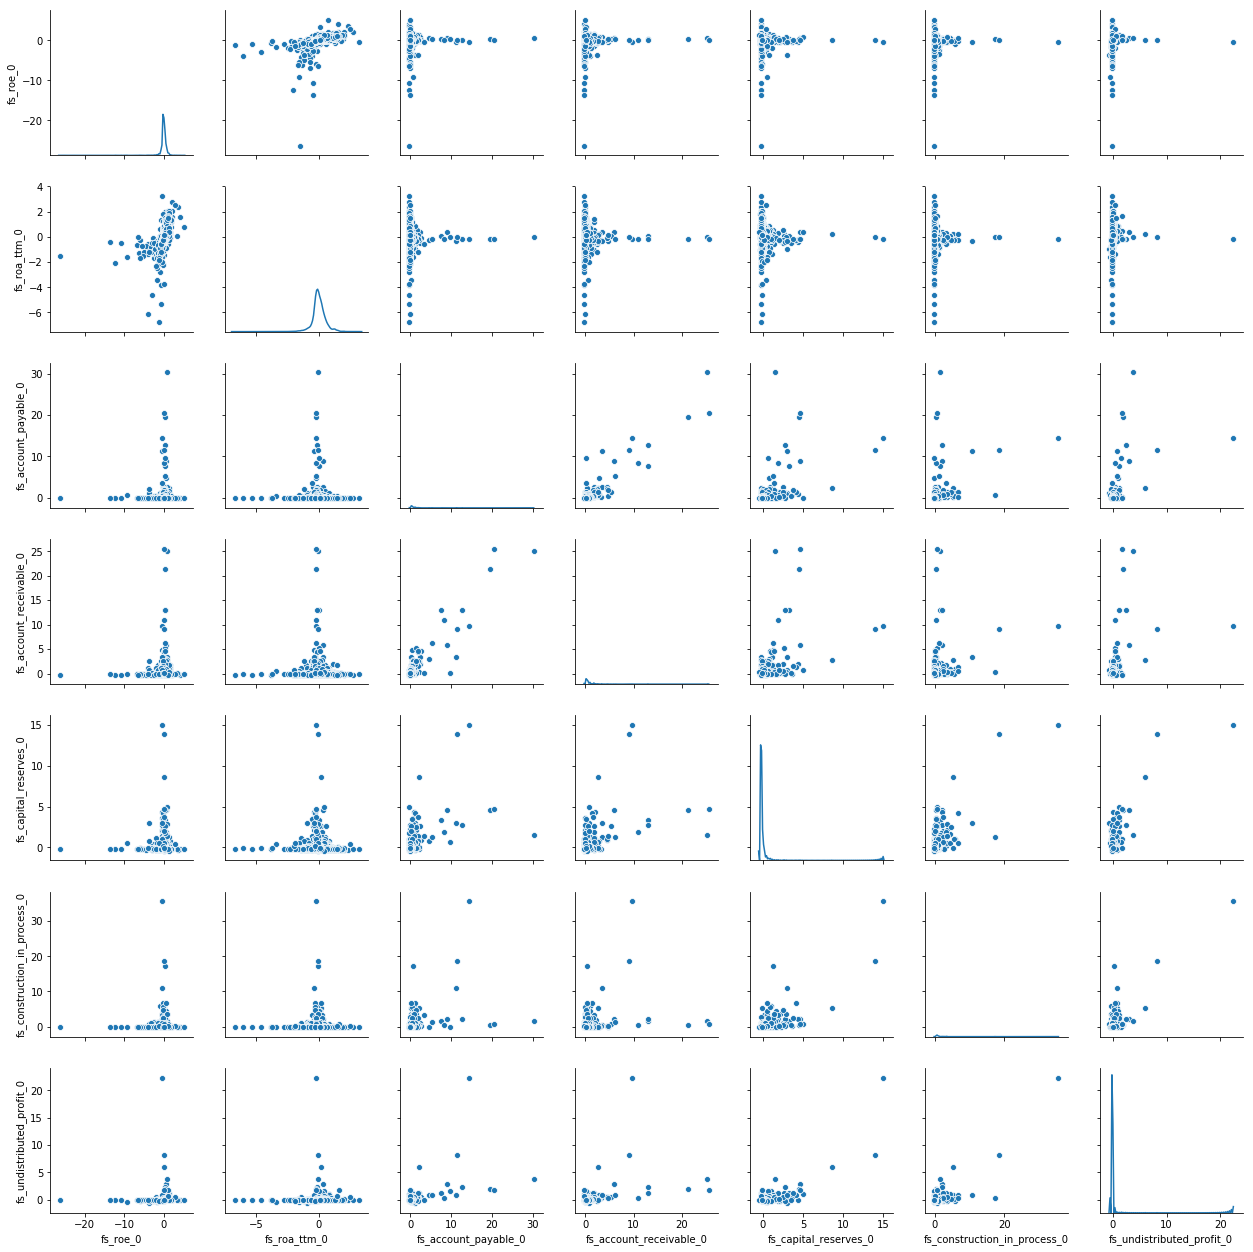

In [5]:
# 本代码由可视化策略环境自动生成 2019年7月23日 11:17
# 本代码单元只能在可视化模式下编辑。您也可以拷贝代码，粘贴到新建的代码单元或者策略，然后修改。


m3 = M.instruments.v2(
    start_date='2017-01-01',
    end_date='2019-01-02',
    market='CN_STOCK_A',
    instrument_list='',
    max_count=0
)

m1 = M.input_features.v1(
    features="""
# #号开始的表示注释，注释需单独一行
# 多个特征，每行一个，可以包含基础特征和衍生特征，特征须为本平台特征
fs_roe_0
fs_roa_ttm_0
fs_account_payable_0
fs_account_payable_0
fs_account_receivable_0
fs_capital_reserves_0
fs_construction_in_process_0
fs_undistributed_profit_0
"""
)

m10 = M.input_features.v1(
    features_ds=m1.data,
    features="""
# #号开始的表示注释，注释需单独一行
# 多个特征，每行一个，可以包含基础特征和衍生特征，特征须为本平台特征
fs_quarter_index_0
fs_quarter_year_0"""
)

m2 = M.use_datasource.v1(
    instruments=m3.data,
    features=m10.data,
    datasource_id='financial_statement_ff_CN_STOCK_A',
    start_date='',
    end_date=''
)

m11 = M.standardlize.v8(
    input_1=m2.data,
    input_2=m1.data,
    columns_input=''
)

m4 = M.dropnan.v1(
    input_data=m11.data
)

m12 = M.filter.v3(
    input_data=m4.data,
    expr='date==\'2017-01-05\'',
    output_left_data=False
)

m6 = M.sns_jointplot.v2(
    input_1=m12.data,
    x='fs_roe_0',
    y='fs_roa_ttm_0',
    kind='reg'
)

m9 = M.sns_displot.v1(
    input_1=m12.data,
    x='fs_roe_0',
    kde=True,
    bins=100
)

m13 = M.sns_catplot.v1(
    input_1=m4.data,
    x='fs_quarter_year_0',
    y='fs_roa_ttm_0',
    kind='strip',
    hue=['fs_quarter_index_0'],
    size=5
)

m8 = M.sns_pairgrid.v3(
    input_1=m12.data,
    input_2=m1.data,
    map_diag='kde',
    map_upper='scatter',
    map_lower='scatter'
)
